# AUTO_PRICE_PREDICTION







*   To develop a predictive machine learning model capable of estimating the price of automobiles using key specifications and performance attributes.

*   The project involves data preprocessing, feature selection, and model evaluation to identify the best-performing regression model.


## 1.READING THE DATA

### 1.1 IMPORTING THE REQUIRED LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

In [ ]:
url='https://drive.google.com/uc?id=1I4k5NC7BxlLax9w36EsxavuKRWTKuEK3'

In [ ]:
pd.set_option('display.max_columns', None)

### 1.2 DATA INSPECTION



*  The dataset was examined to understand its structure and contents.

*   Basic checks were performed to review data types, missing values, duplicates, and summary statistics.



In [ ]:
column_names=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
auto=pd.read_csv(url,names=column_names)

In [ ]:
auto

symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
196         -1                95        volvo       gas        std   
197         -1                95        volvo       gas      turbo   
198         -1                95        volvo       gas        std   
199         -1                95        volvo    diesel      turbo   
200         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           front        88.6   
1            two  convertible          rwd           front        88.6   
2            two    hatchback          rwd           front        94.5   
3           four        sedan          fwd           front        99.8   
4           four        sedan          4wd           front        99.4   
..           ...          ...          ...             ...         ...   
196         four        sedan          rwd           front       109.1   
197         four        sedan          rwd           front       109.1   
198         four        sedan          rwd           front       109.1   
199         four        sedan          rwd           front       109.1   
200         four        sedan          rwd           front       109.1   

     length  width  height  curb-weight engine-type num-of-cylinders  \
0     168.8   64.1    48.8         2548        dohc             four   
1     168.8   64.1    48.8         2548        dohc             four   
2     171.2   65.5    52.4         2823        ohcv              six   
3     176.6   66.2    54.3         2337         ohc             four   
4     176.6   66.4    54.3         2824         ohc             five   
..      ...    ...     ...          ...         ...              ...   
196   188.8   68.9    55.5         2952         ohc             four   
197   188.8   68.8    55.5         3049         ohc             four   
198   188.8   68.9    55.5         3012        ohcv              six   
199   188.8   68.9    55.5         3217         ohc              six   
200   188.8   68.9    55.5         3062         ohc             four   

     engine-size fuel-system  bore stroke  compression-ratio horsepower  \
0            130        mpfi  3.47   2.68                9.0        111   
1            130        mpfi  3.47   2.68                9.0        111   
2            152        mpfi  2.68   3.47                9.0        154   
3            109        mpfi  3.19   3.40               10.0        102   
4            136        mpfi  3.19   3.40                8.0        115   
..           ...         ...   ...    ...                ...        ...   
196          141        mpfi  3.78   3.15                9.5        114   
197          141        mpfi  3.78   3.15                8.7        160   
198          173        mpfi  3.58   2.87                8.8        134   
199          145         idi  3.01   3.40               23.0        106   
200          141        mpfi  3.78   3.15                9.5        114   

    peak-rpm  city-mpg  highway-mpg  price  
0       5000        21           27  13495  
1       5000        21           27  16500  
2       5000        19           26  16500  
3       5500        24           30  13950  
4       5500        18           22  17450  
..       ...       ...          ...    ...  
196     5400        23           28  16845  
197     5300        19           25  19045  
198     5500        18           23  21485  
199     4800        26           27  22470  
200     5400  

In [ ]:
auto.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   
2  2.68   3.47                9.0        154     5000        19           26   
3  3.19   3.40               10.0        102     5500        24           30   
4  3.19   3.40                8.0        115     5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

In [ ]:
auto.tail()

symboling normalized-losses   make fuel-type aspiration num-of-doors  \
196         -1                95  volvo       gas        std         four   
197         -1                95  volvo       gas      turbo         four   
198         -1                95  volvo       gas        std         four   
199         -1                95  volvo    diesel      turbo         four   
200         -1                95  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
196      sedan          rwd           front       109.1   188.8   68.9   
197      sedan          rwd           front       109.1   188.8   68.8   
198      sedan          rwd           front       109.1   188.8   68.9   
199      sedan          rwd           front       109.1   188.8   68.9   
200      sedan          rwd           front       109.1   188.8   68.9   

     height  curb-weight engine-type num-of-cylinders  engine-size  \
196    55.5         2952         ohc             four          141   
197    55.5         3049         ohc             four          141   
198    55.5         3012        ohcv              six          173   
199    55.5         3217         ohc              six          145   
200    55.5         3062         ohc             four          141   

    fuel-system  bore stroke  compression-ratio horsepower peak-rpm  city-mpg  \
196        mpfi  3.78   3.15                9.5        114     5400        23   
197        mpfi  3.78   3.15                8.7        160     5300        19   
198        mpfi  3.58   2.87                8.8        134     5500        18   
199         idi  3.01   3.40               23.0        106     4800        26   
200        mpfi  3.78   3.15                9.5        114     5400        19   

     highway-mpg  price  
196           28  16845  
197           25  19045  
198           23  21485  
199           27  22470  
200           25  22625

In [ ]:
auto.shape

(201, 26)

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [ ]:
auto.describe()

symboling  wheel-base      length       width      height  \
count  201.000000  201.000000  201.000000  201.000000  201.000000   
mean     0.840796   98.797015  174.200995   65.889055   53.766667   
std      1.254802    6.066366   12.322175    2.101471    2.447822   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.800000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.500000   66.600000   55.500000   
max      3.000000  120.900000  208.100000   72.000000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  \
count   201.000000   201.000000         201.000000  201.000000   201.000000   
mean   2555.666667   126.875622          10.164279   25.179104    30.686567   
std     517.296727    41.546834           4.004965    6.423220     6.815150   
min    1488.000000    61.000000           7.000000   13.000000    16.000000   
25%    2169.000000    98.000000           8.600000   19.000000    25.000000   
50%    2414.000000   120.000000           9.000000   24.000000    30.000000   
75%    2926.000000   141.000000           9.400000   30.000000    34.000000   
max    4066.000000   326.000000          23.000000   49.000000    54.000000   

              price  
count    201.000000  
mean   13207.129353  
std     7947.066342  
min     5118.000000  
25%     7775.000000  
50%    10295.000000  
75%    16500.000000  
max    45400.000000

In [ ]:
auto.describe(include='O')

normalized-losses    make fuel-type aspiration num-of-doors body-style  \
count                201     201       201        201          201        201   
unique                52      22         2          2            3          5   
top                    ?  toyota       gas        std         four      sedan   
freq                  37      32       181        165          113         94   

       drive-wheels engine-location engine-type num-of-cylinders fuel-system  \
count           201             201         201              201         201   
unique            3               2           6                7           8   
top             fwd           front         ohc             four        mpfi   
freq            118             198         145              157          92   

        bore stroke horsepower peak-rpm  
count    201    201        201      201  
unique    39     37         59       23  
top     3.62   3.40         68     5500  
freq      23     19         19       36

In [ ]:
numeric_col_dtype_change = [
    'symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
    'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
    'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
]
for col in numeric_col_dtype_change:
    if col in auto.columns:
        auto[col] = pd.to_numeric(auto[col], errors='coerce')

In [ ]:
auto.replace('?',np.nan,inplace=True)

In [ ]:
auto.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [ ]:
auto.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [ ]:
auto.duplicated().sum()

np.int64(0)

In [ ]:
column=auto.columns

In [ ]:
for col in column:
    print(f"{col}: {auto[col].nunique()}")

symboling: 6
normalized-losses: 51
make: 22
fuel-type: 2
aspiration: 2
num-of-doors: 2
body-style: 5
drive-wheels: 3
engine-location: 2
wheel-base: 52
length: 73
width: 43
height: 49
curb-weight: 169
engine-type: 6
num-of-cylinders: 7
engine-size: 43
fuel-system: 8
bore: 38
stroke: 36
compression-ratio: 32
horsepower: 58
peak-rpm: 22
city-mpg: 29
highway-mpg: 30
price: 186


In [ ]:
categorical_col=['symboling','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
for col in categorical_col:
  print(f"\nValue counts for '{col}':")
  print(auto[col].value_counts())


Value counts for 'symboling':
symboling
 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

Value counts for 'make':
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

Value counts for 'fuel-type':
fuel-type
gas       181
diesel     20
Name: count, dtype: int64

Value counts for 'aspiration':
aspiration
std      165
turbo     36
Name: count, dtype: int64

Value counts for 'num-of-doors':
num-of-doors
four    113
two      86
Name: count, dtype: int64

Value counts for 'body-style':
body-style
sedan          94
hatchback      68
wagon          2

### 1.3 HANDLING THE MISSING VALUES

In [ ]:
for col in column:
    if auto[col].dtypes=='object':
        auto[col] = auto[col].fillna(auto[col].mode()[0])
    else:
        auto[col]=auto[col].fillna(auto[col].median())

In [ ]:
auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
auto

symboling  normalized-losses         make fuel-type aspiration  \
0            3              115.0  alfa-romero       gas        std   
1            3              115.0  alfa-romero       gas        std   
2            1              115.0  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
196         -1               95.0        volvo       gas        std   
197         -1               95.0        volvo       gas      turbo   
198         -1               95.0        volvo       gas        std   
199         -1               95.0        volvo    diesel      turbo   
200         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           front        88.6   
1            two  convertible          rwd           front        88.6   
2            two    hatchback          rwd           front        94.5   
3           four        sedan          fwd           front        99.8   
4           four        sedan          4wd           front        99.4   
..           ...          ...          ...             ...         ...   
196         four        sedan          rwd           front       109.1   
197         four        sedan          rwd           front       109.1   
198         four        sedan          rwd           front       109.1   
199         four        sedan          rwd           front       109.1   
200         four        sedan          rwd           front       109.1   

     length  width  height  curb-weight engine-type num-of-cylinders  \
0     168.8   64.1    48.8         2548        dohc             four   
1     168.8   64.1    48.8         2548        dohc             four   
2     171.2   65.5    52.4         2823        ohcv              six   
3     176.6   66.2    54.3         2337         ohc             four   
4     176.6   66.4    54.3         2824         ohc             five   
..      ...    ...     ...          ...         ...              ...   
196   188.8   68.9    55.5         2952         ohc             four   
197   188.8   68.8    55.5         3049         ohc             four   
198   188.8   68.9    55.5         3012        ohcv              six   
199   188.8   68.9    55.5         3217         ohc              six   
200   188.8   68.9    55.5         3062         ohc             four   

     engine-size fuel-system  bore  stroke  compression-ratio  horsepower  \
0            130        mpfi  3.47    2.68                9.0       111.0   
1            130        mpfi  3.47    2.68                9.0       111.0   
2            152        mpfi  2.68    3.47                9.0       154.0   
3            109        mpfi  3.19    3.40               10.0       102.0   
4            136        mpfi  3.19    3.40                8.0       115.0   
..           ...         ...   ...     ...                ...         ...   
196          141        mpfi  3.78    3.15                9.5       114.0   
197          141        mpfi  3.78    3.15                8.7       160.0   
198          173        mpfi  3.58    2.87                8.8       134.0   
199          145         idi  3.01    3.40               23.0       106.0   
200          141        mpfi  3.78    3.15                9.5       114.0   

     peak-rpm  city-mpg  highway-mpg  price  
0      5000.0        21           27  13495  
1      5000.0        21           27  16500  
2      5000.0        19           26  16500  
3      5500.0        24           30  13950  
4      5500.0        18           22  17450  
..        ...       ...          ...    ...  
196    5400.0        23           28  16845  
197    5300.0        19           25  19045  
198    5500.0        18           23  21485  
199    4800.0

## 2.EXPLORATORY DATA ANALYSIS(EDA)

In [ ]:
numeric_col=auto.select_dtypes(exclude='O').columns
numeric_col

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
categorical_col=auto.select_dtypes(include='O').columns
categorical_col

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

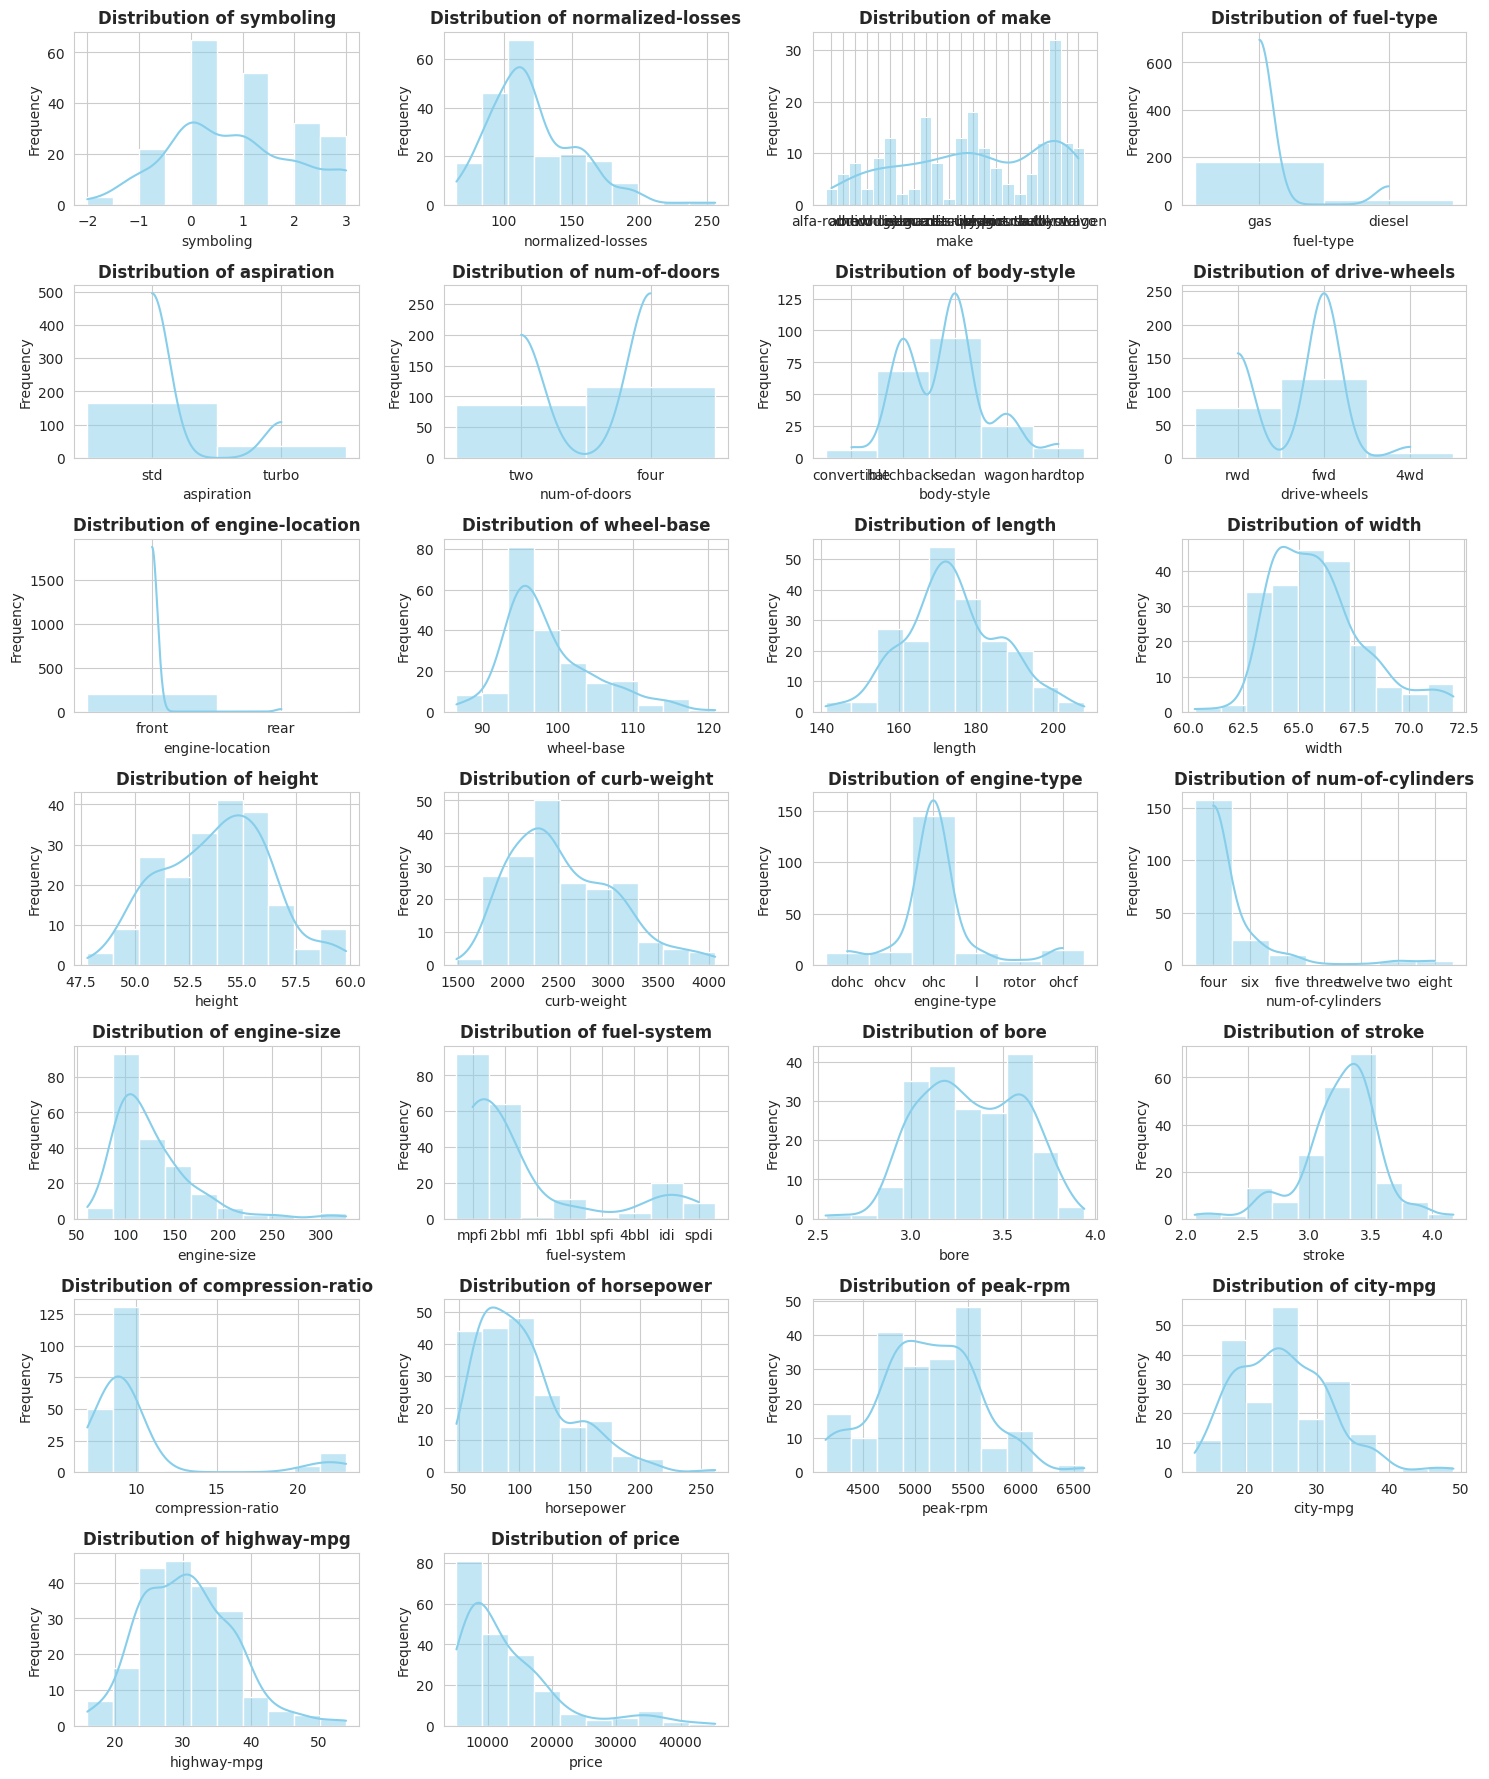

In [ ]:
plt.figure(figsize=(15,20))
sns.set_style("whitegrid")
pos=1
for col in column:
  plt.subplot(8,4,pos)
  sns.histplot(x=auto[col],data=auto,kde=True,bins=10,color='skyblue')
  plt.xlabel(col, fontsize=10)
  plt.ylabel("Frequency", fontsize=10)
  plt.title(f"Distribution of {col}", fontsize=12, fontweight='bold')
  pos=pos+1
plt.tight_layout()
plt.show()

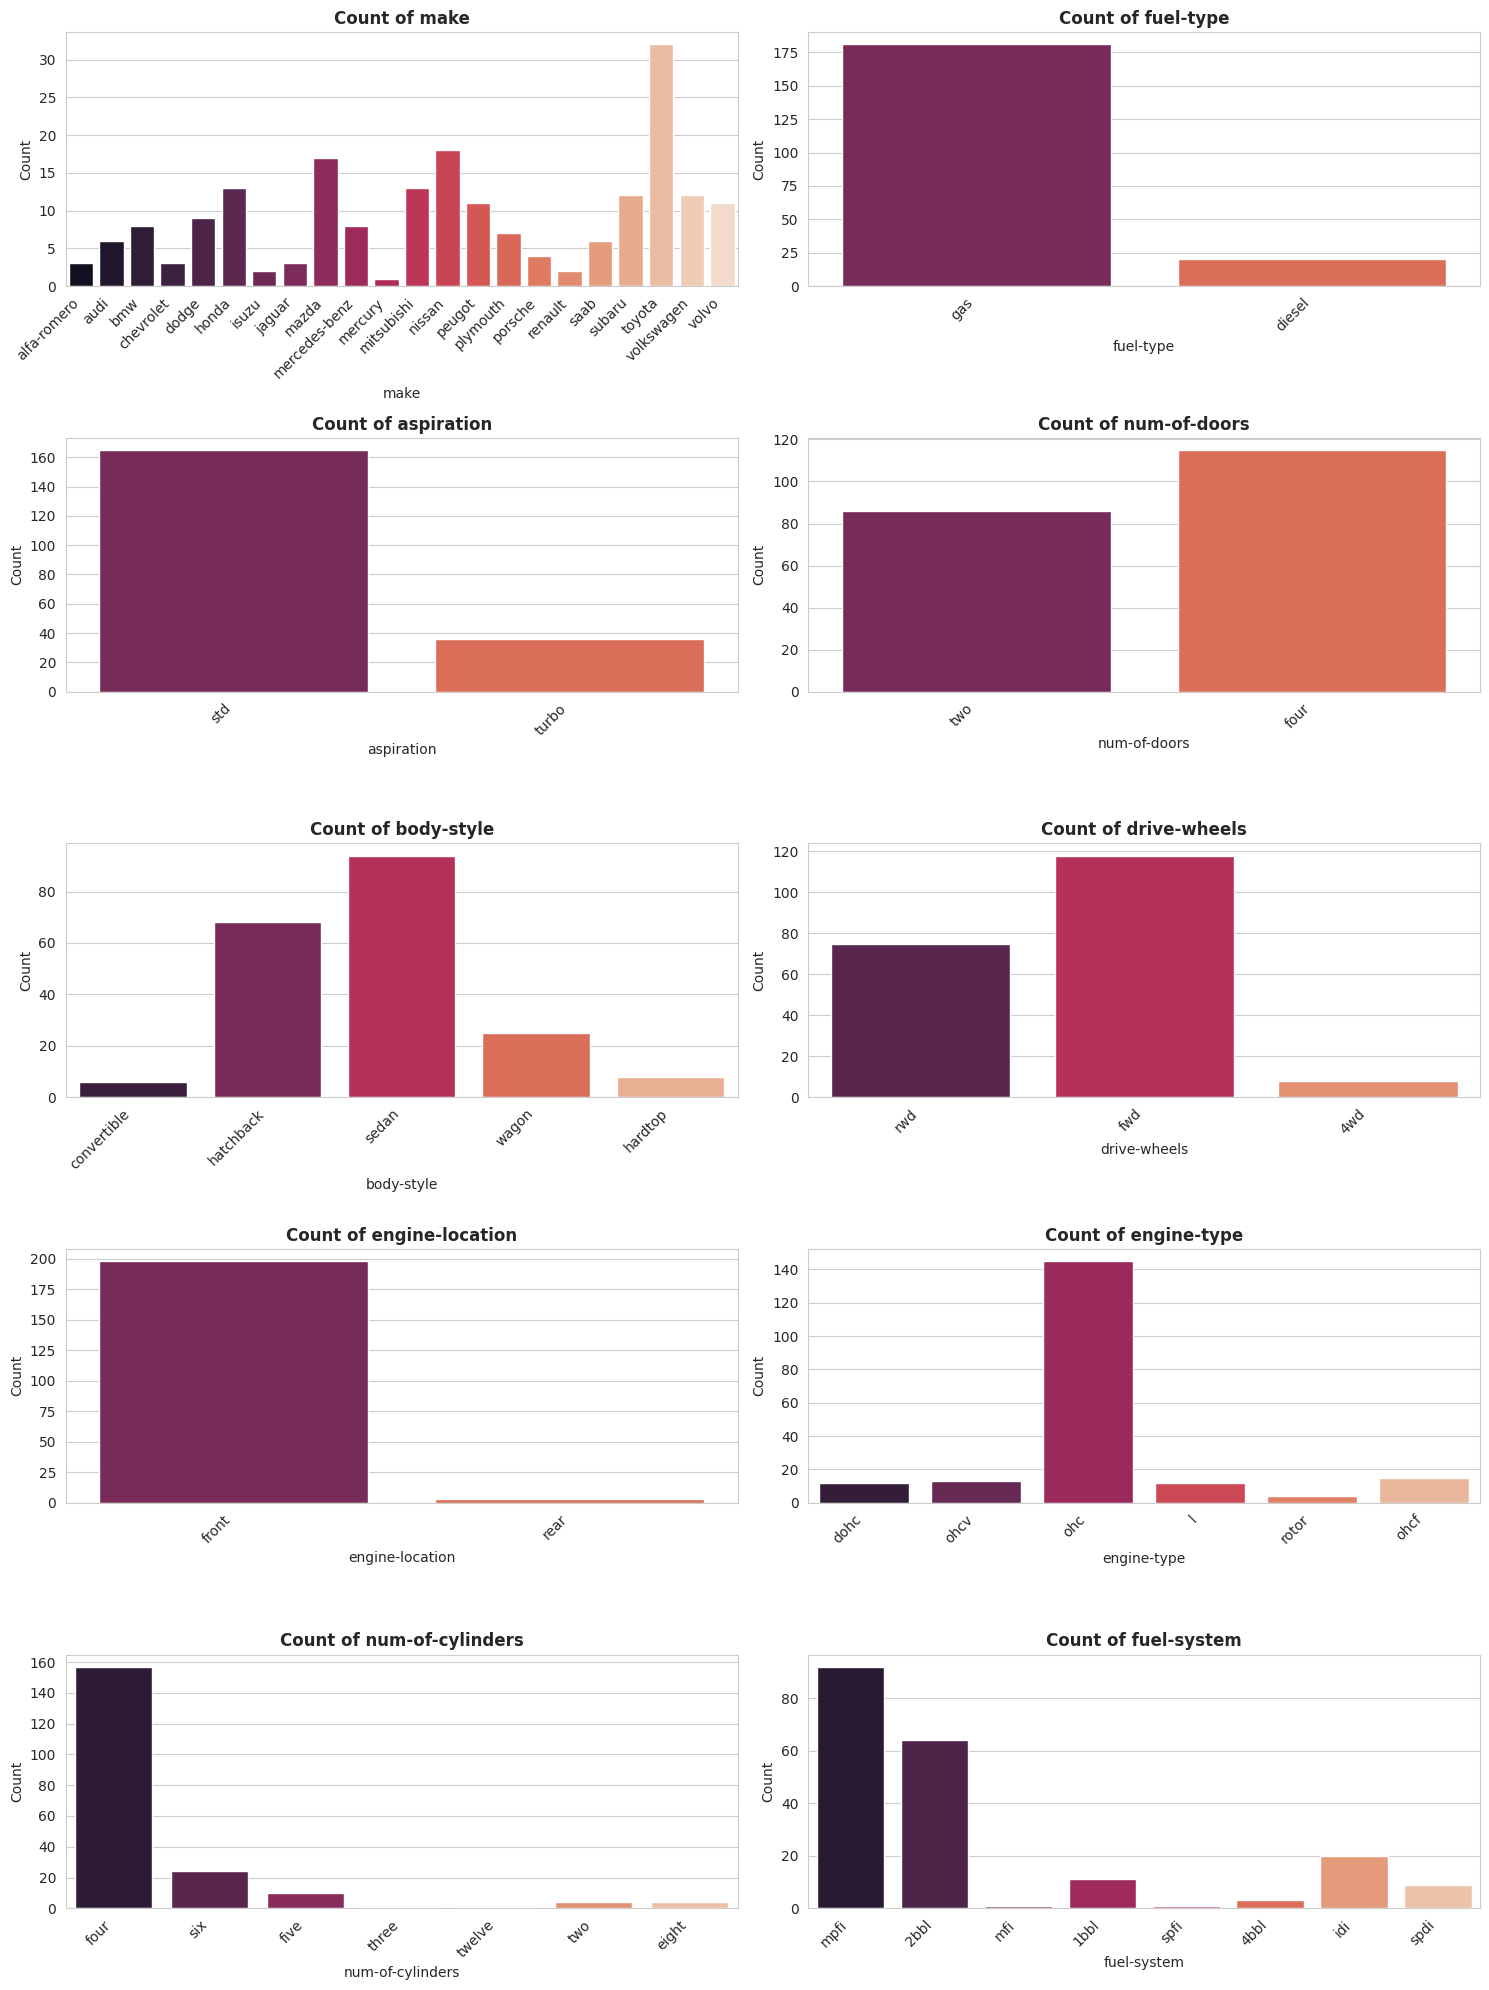

In [ ]:
plt.figure(figsize=(15,20))
pos=1
for col in categorical_col:
  plt.subplot(5,2,pos)
  sns.countplot(x=auto[col],data=auto,palette="rocket")
  plt.xticks(rotation=45, ha='right')
  plt.xlabel(col, fontsize=10)
  plt.ylabel("Count", fontsize=10)
  plt.title(f"Count of {col}", fontsize=12, fontweight='bold')
  pos=pos+1
plt.tight_layout()
plt.show()

<Figure size 1500x2000 with 0 Axes>

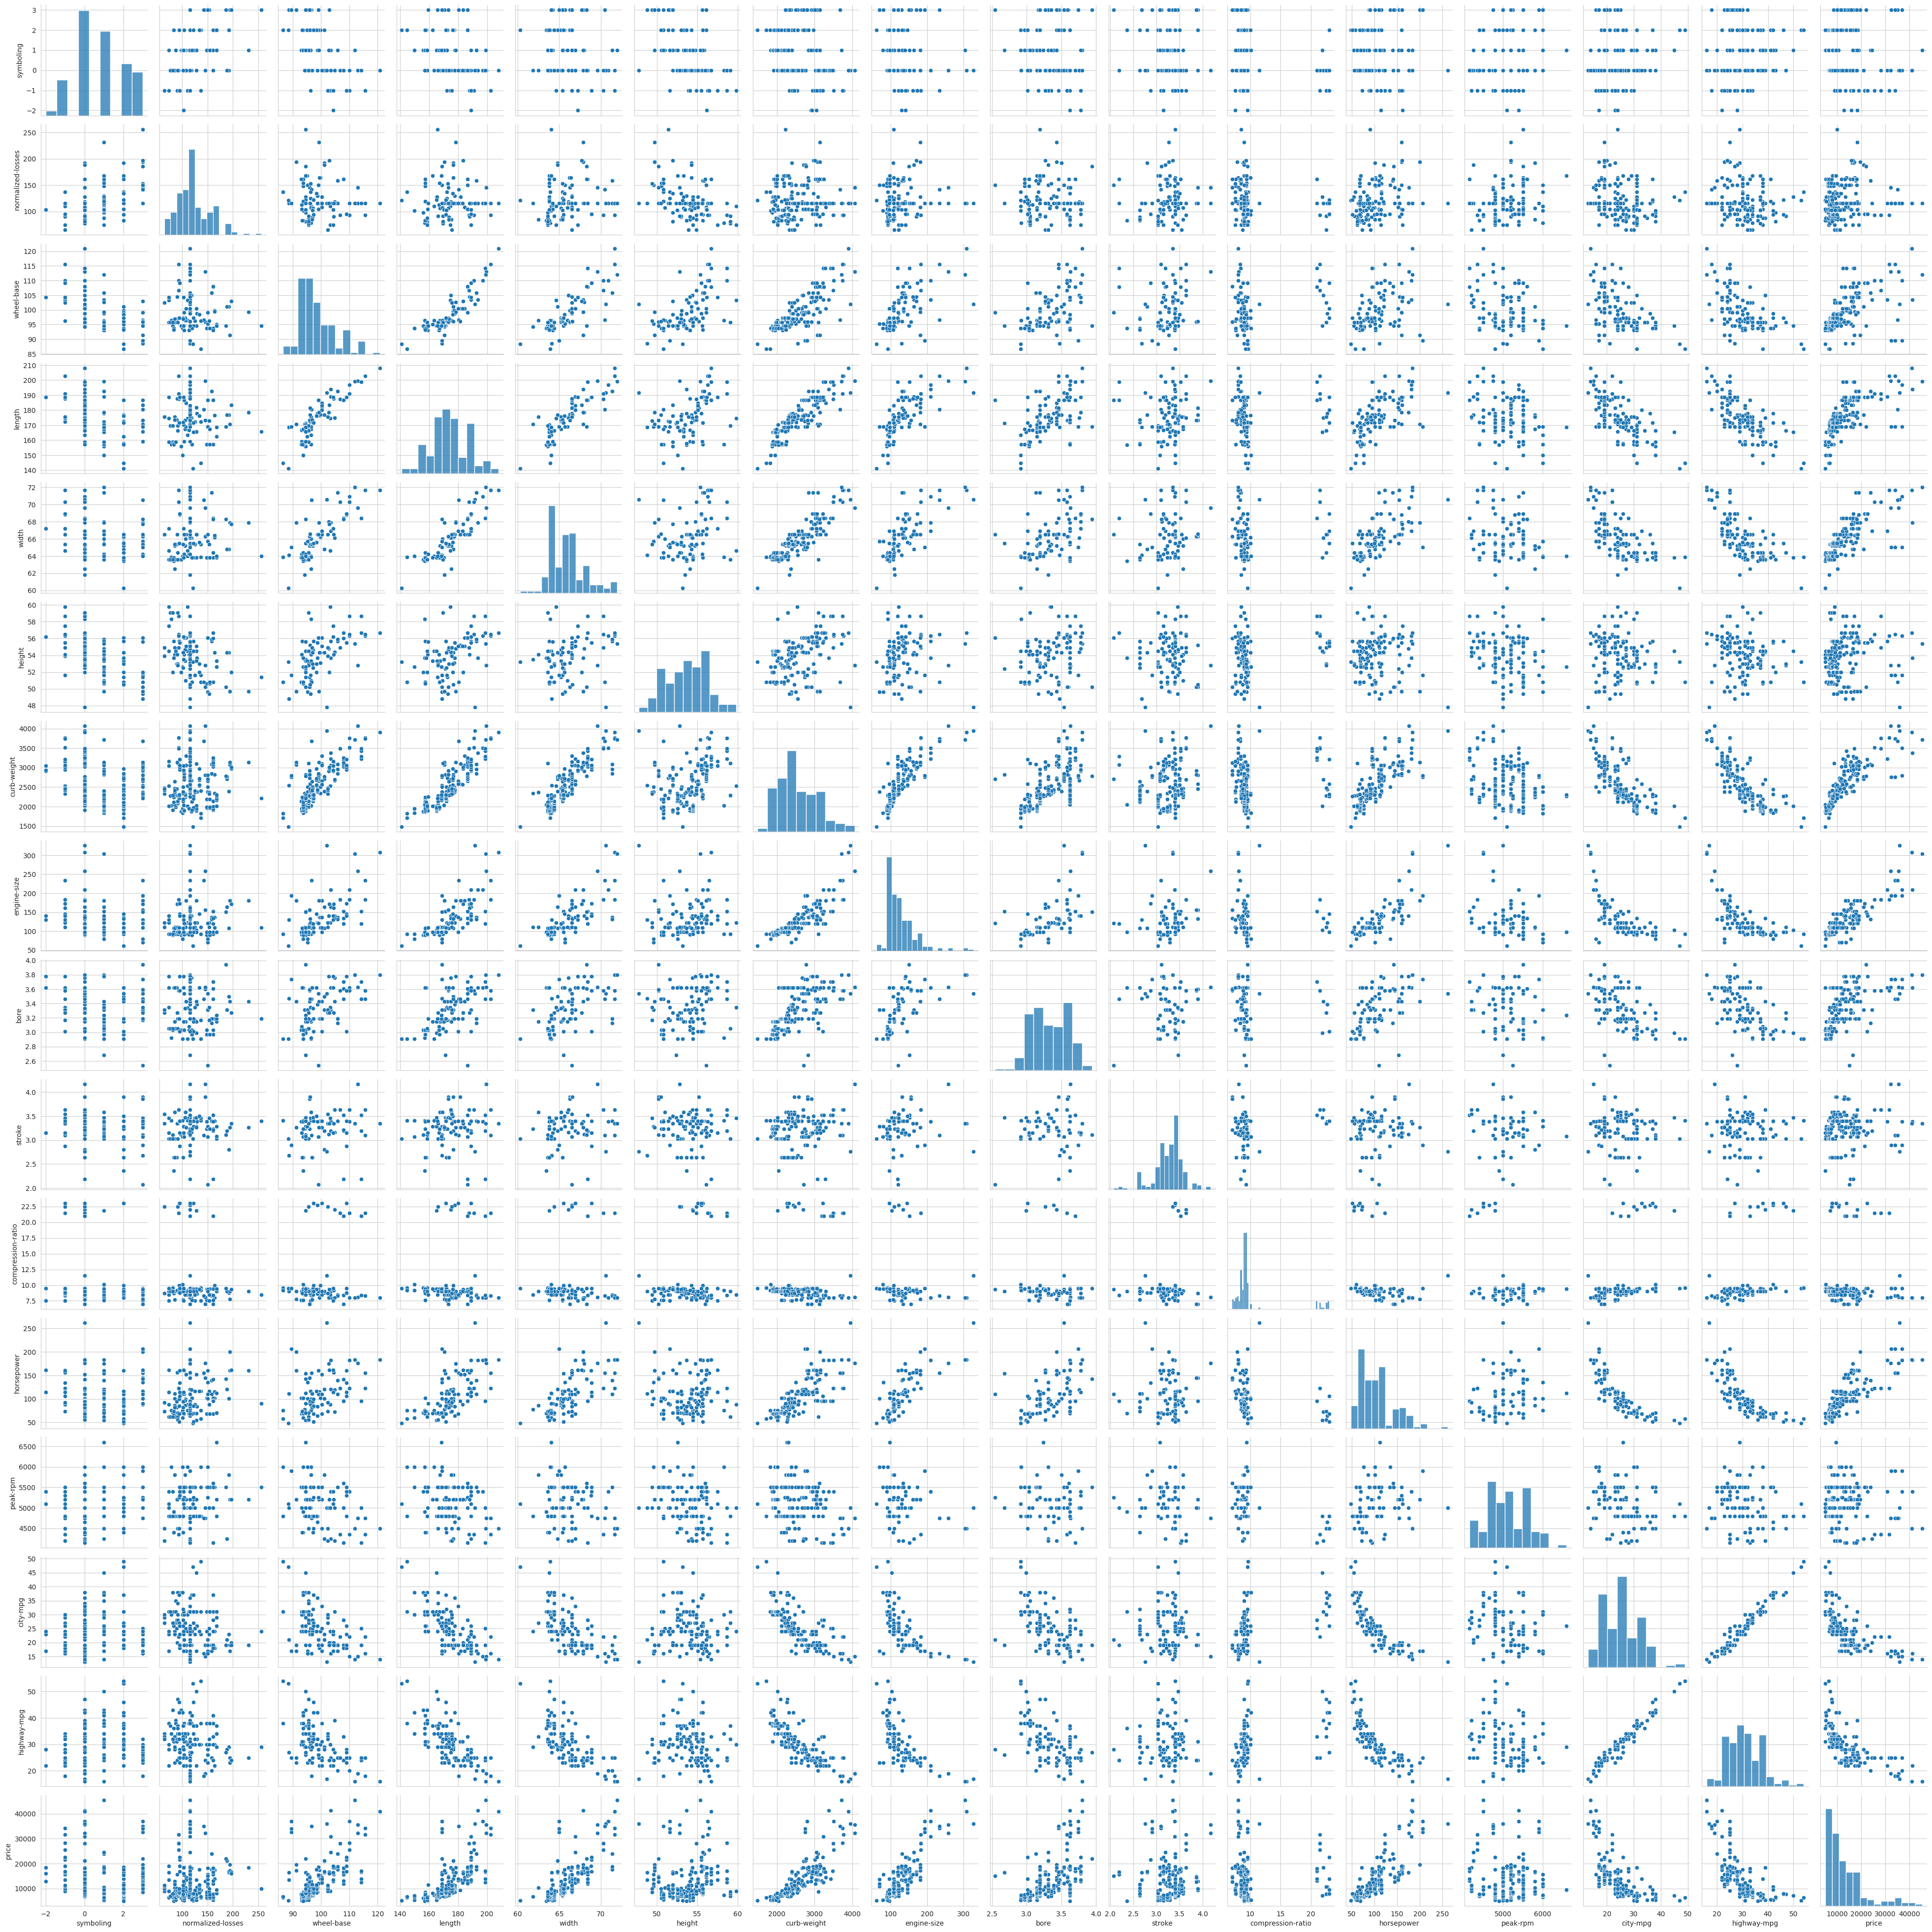

In [ ]:
plt.figure(figsize=(15,20))
sns.pairplot(auto)
plt.show()

## 3.DATA PREPROCESSING

### 3.1 CHECKING FOR OUTLIERS

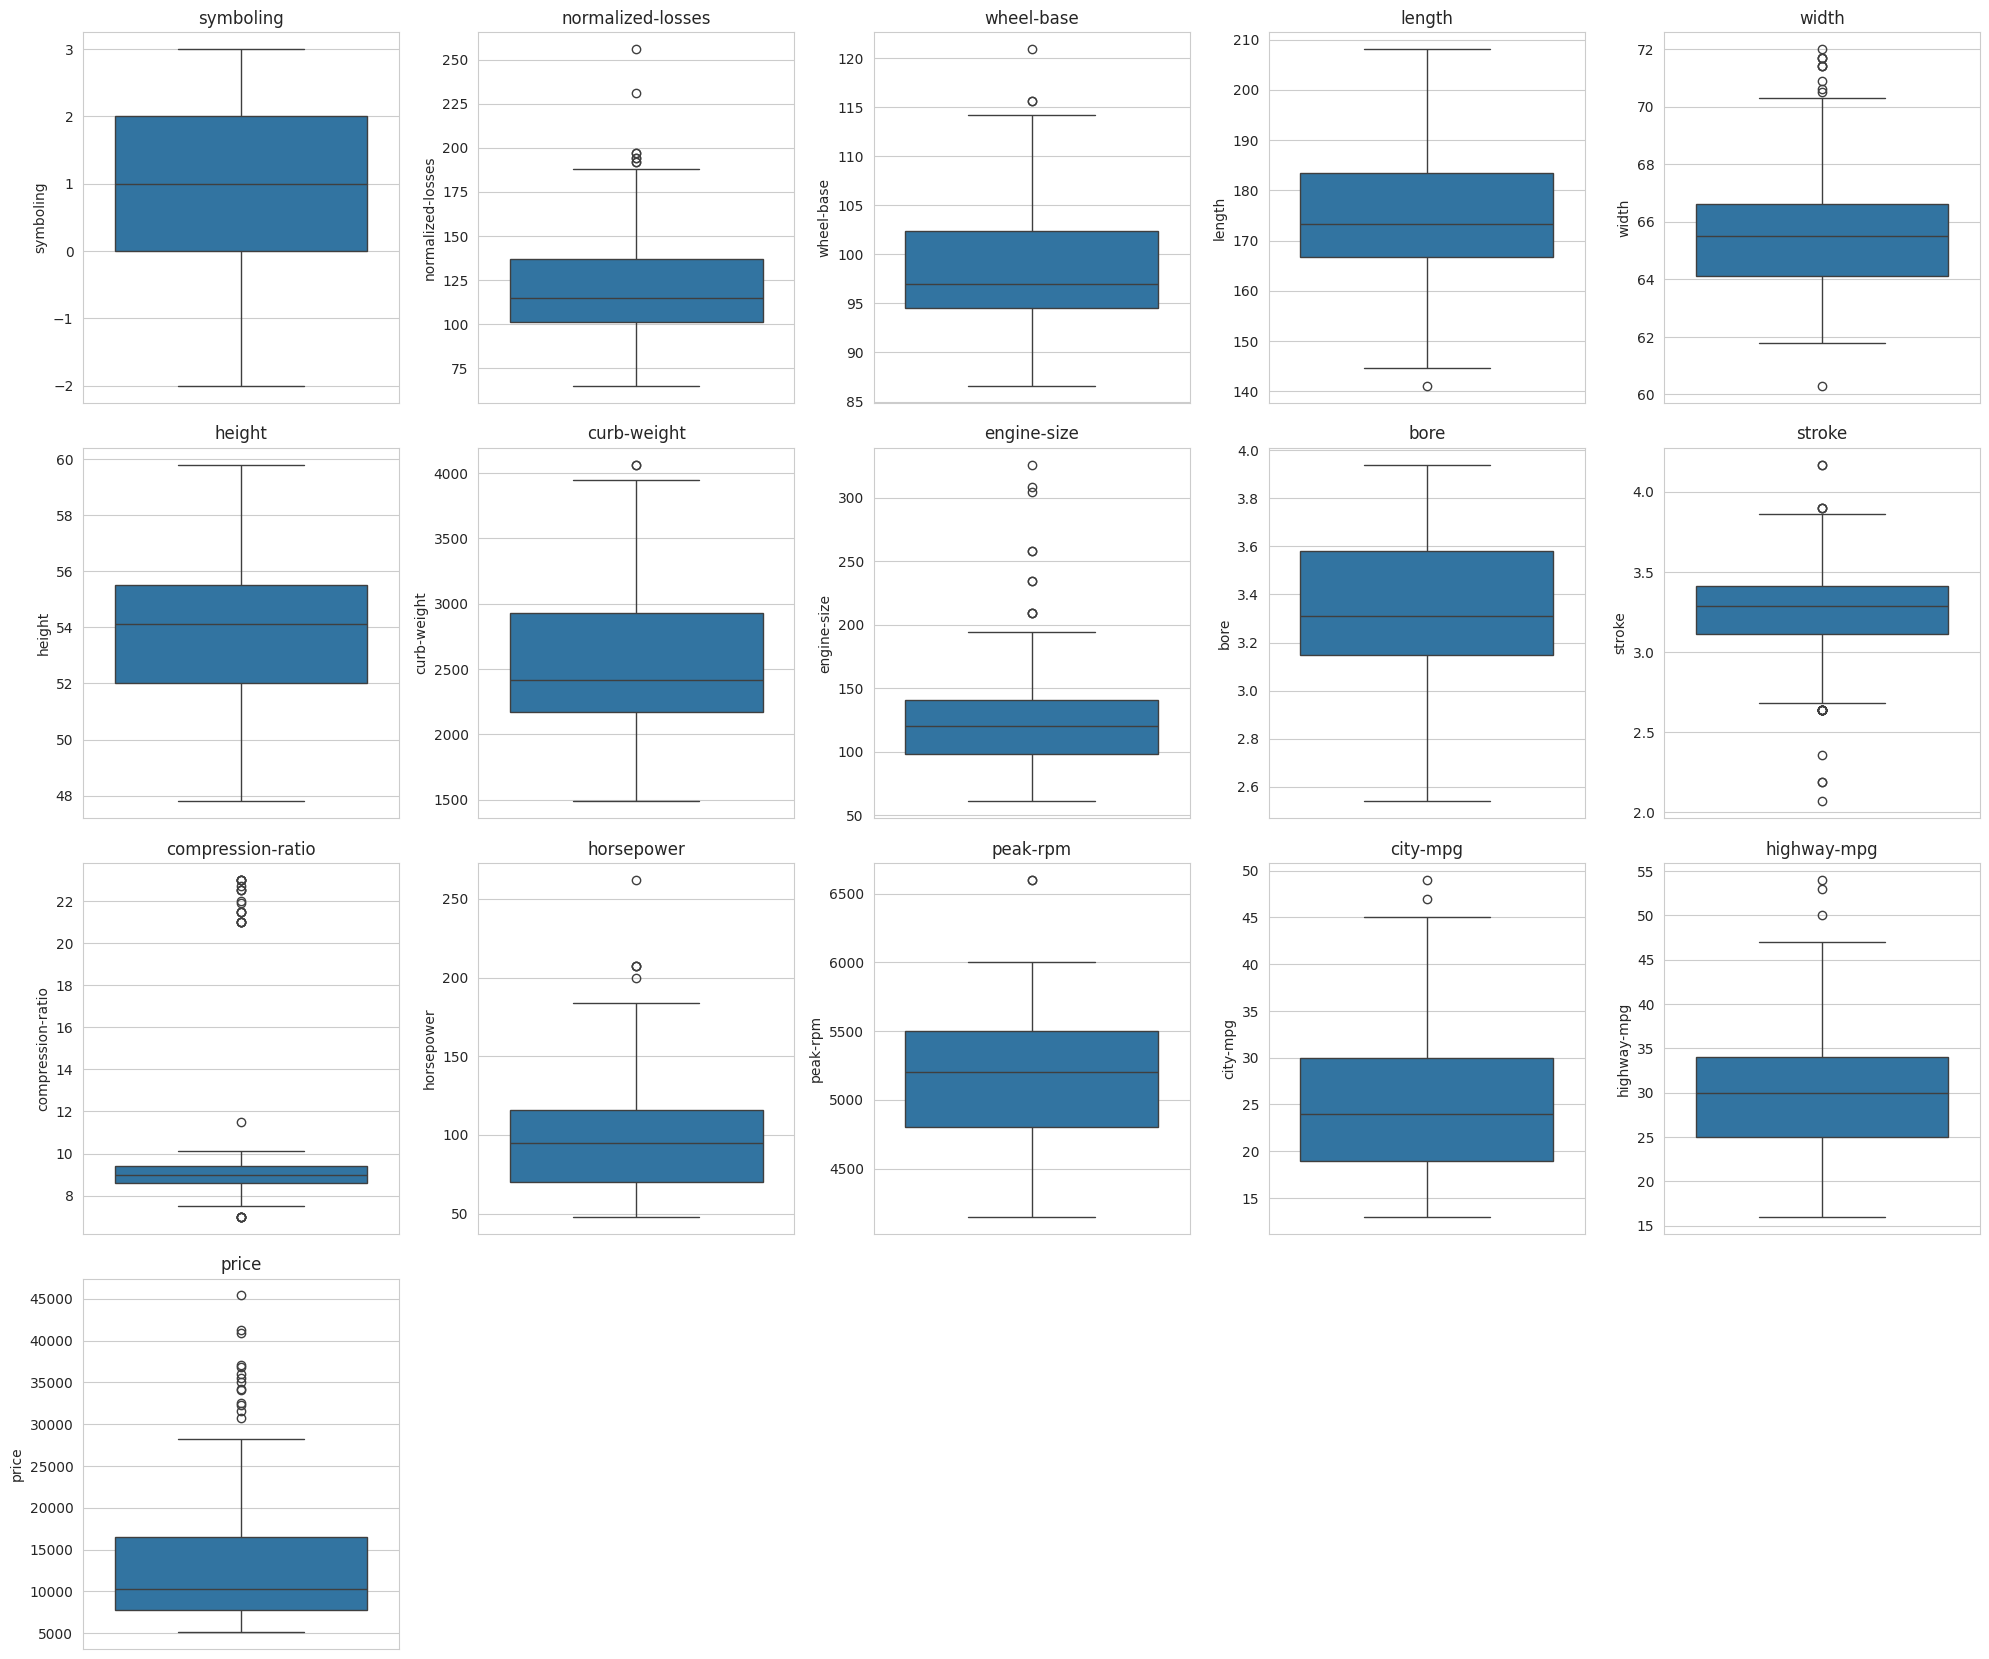

In [ ]:
plt.figure(figsize=(20,25))
pos=1
for col in numeric_col:
  plt.subplot(6,5,pos)
  sns.boxplot(auto[col])
  plt.title(col)
  pos=pos+1
plt.tight_layout()
plt.show()

### 3.2 REMOVING OUTLIERS


In [ ]:
def remove_outliers(auto):
  df_clean = auto.copy()
  numeric_columns=df_clean.select_dtypes(include='number').columns
  for col in numeric_columns:
    Q1=df_clean[col].quantile(0.25)
    Q3=df_clean[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df_clean=df_clean[(df_clean[col]>=lower_bound)&(df_clean[col]<=upper_bound)]
  print(f"Rows before: {auto.shape[0]} --> After: {df_clean.shape[0]}")
  return df_clean

df_cleaned = remove_outliers(auto)

Rows before: 201 --> After: 120


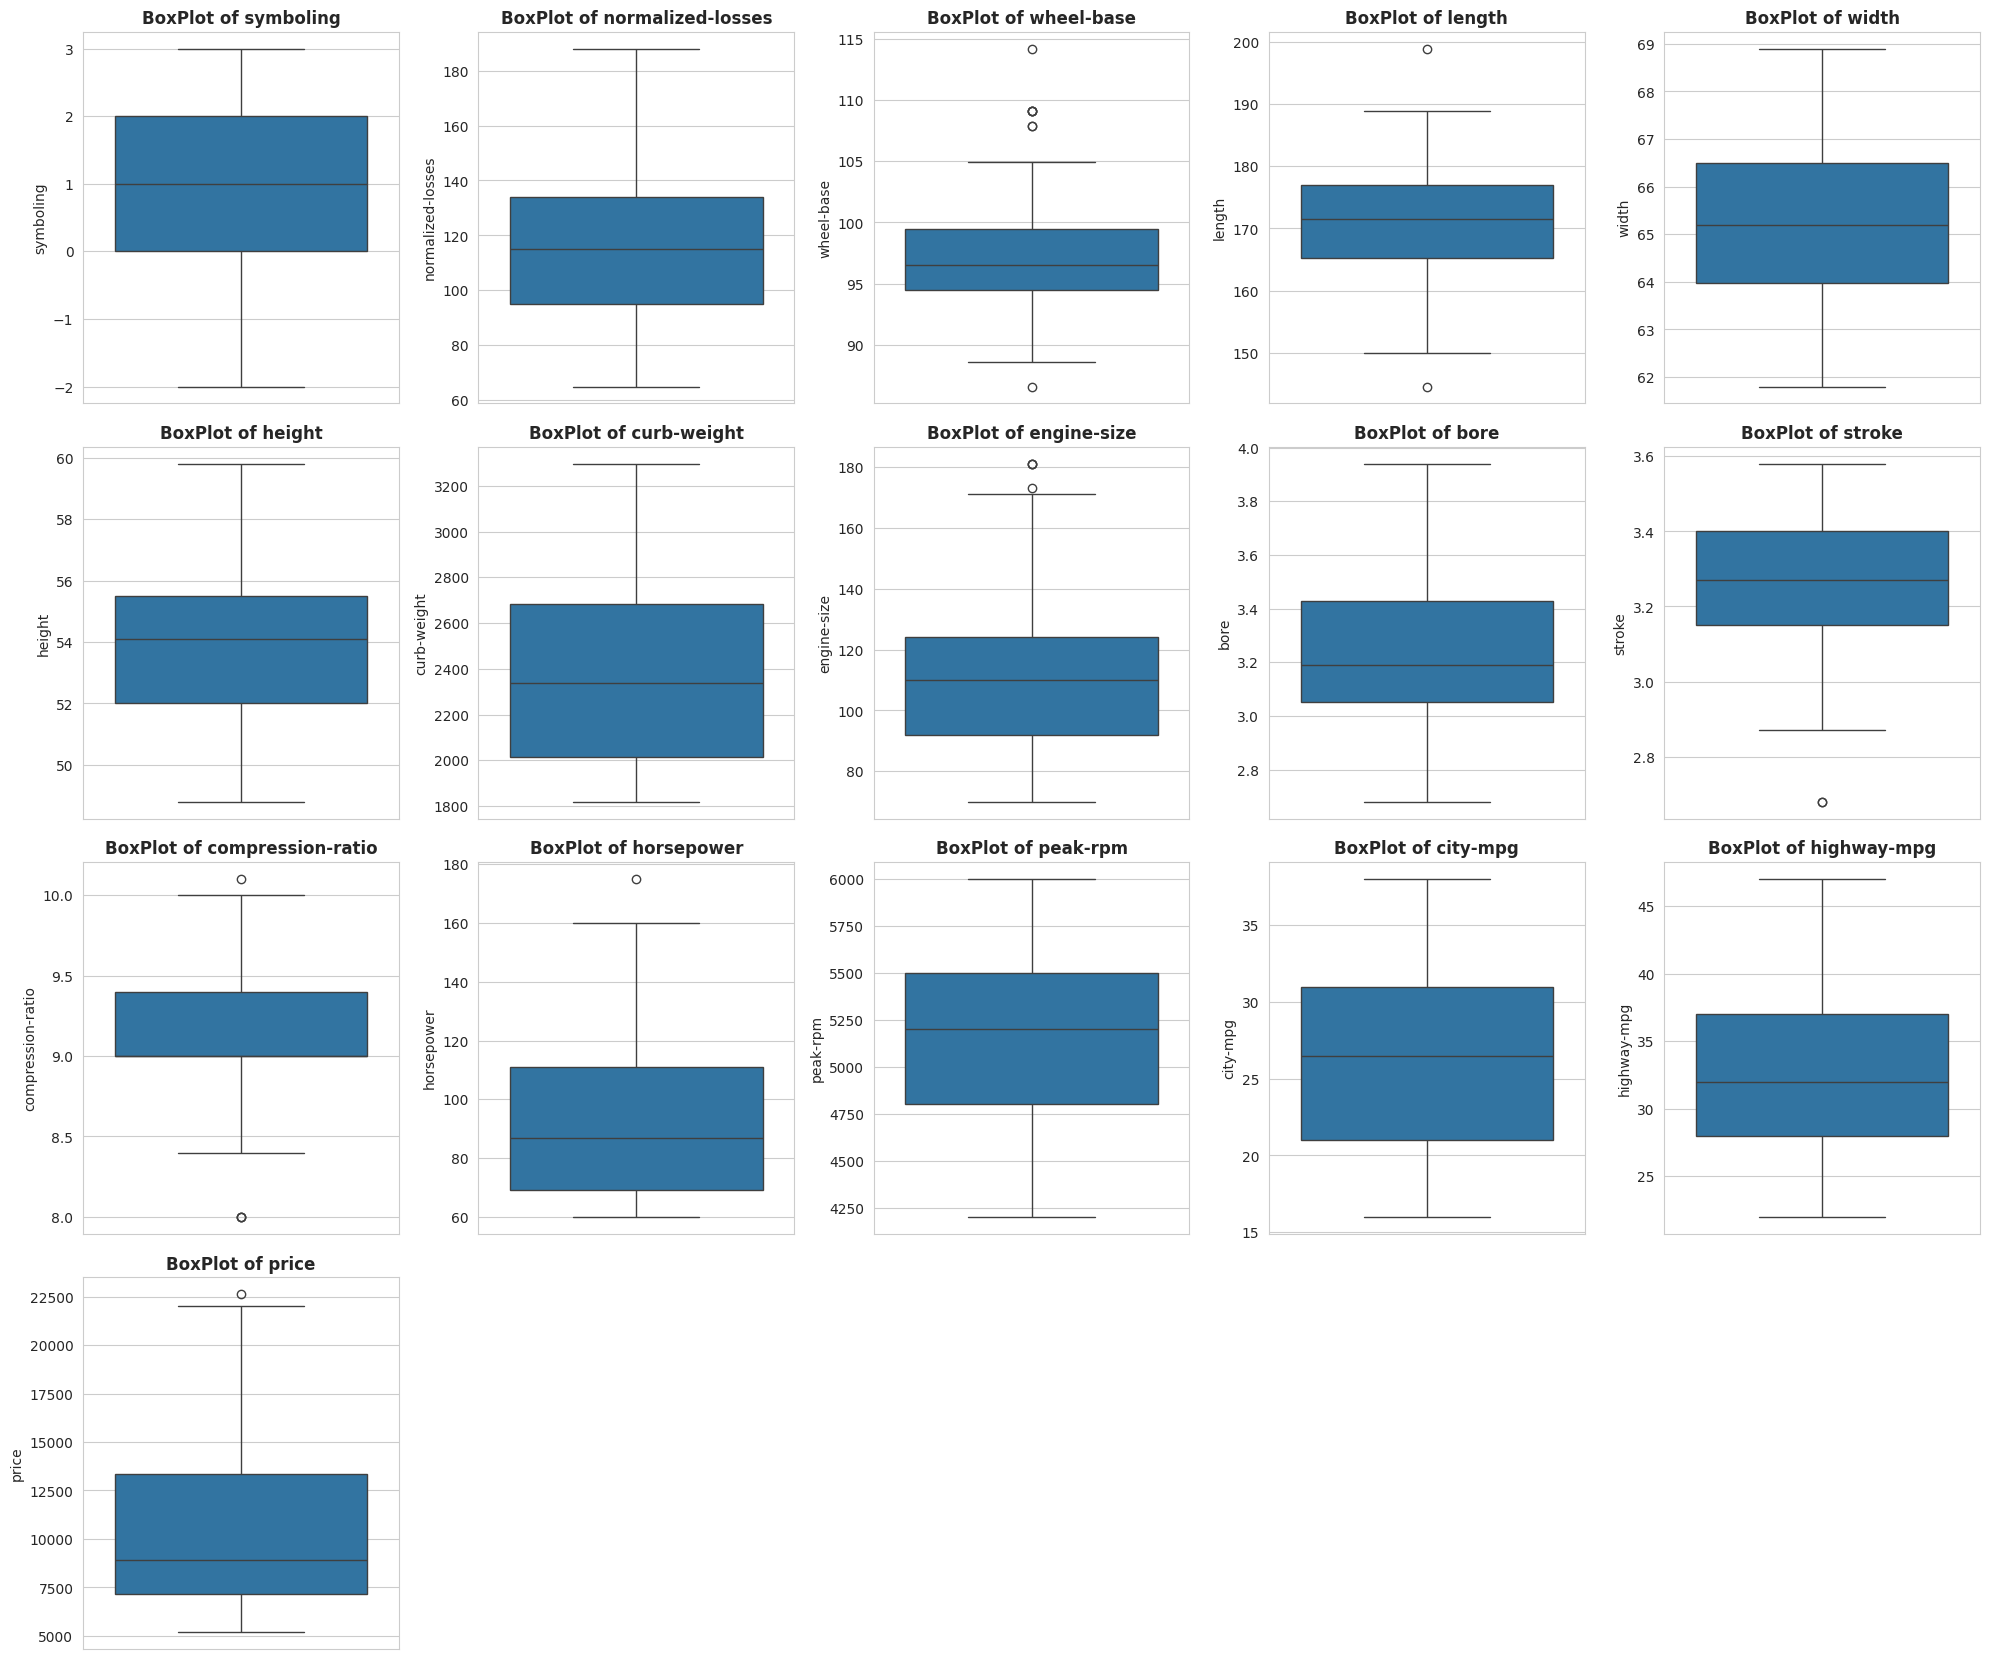

In [ ]:
numeric_columns_cleaned = df_cleaned.select_dtypes(include='number').columns
plt.figure(figsize=(20,25))
pos=1
for col in numeric_columns_cleaned:
  plt.subplot(6,5,pos)
  sns.boxplot(df_cleaned[col])
  plt.title(f"BoxPlot of {col}",fontsize=12, fontweight='bold')
  pos=pos+1
plt.tight_layout()
plt.show()

### 3.3 ENCODING


*   Encoding is an important data preprocessing step used to convert categorical data (text labels) into numeric values so machine learning models can understand and process them.



In [ ]:
categorical_col

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

Label Encoding
* Converts categories into numeric labels
* Good for ordinal data

In [ ]:
le=LabelEncoder()
for i in categorical_col:
  auto[i]=le.fit_transform(auto[i])

In [ ]:
auto

symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0            3              115.0     0          1           0             1   
1            3              115.0     0          1           0             1   
2            1              115.0     0          1           0             1   
3            2              164.0     1          1           0             0   
4            2              164.0     1          1           0             0   
..         ...                ...   ...        ...         ...           ...   
196         -1               95.0    21          1           0             0   
197         -1               95.0    21          1           1             0   
198         -1               95.0    21          1           0             0   
199         -1               95.0    21          0           1             0   
200         -1               95.0    21          1           1             0   

     body-style  drive-wheels  engine-location  wheel-base  length  width  \
0             0             2                0        88.6   168.8   64.1   
1             0             2                0        88.6   168.8   64.1   
2             2             2                0        94.5   171.2   65.5   
3             3             1                0        99.8   176.6   66.2   
4             3             0                0        99.4   176.6   66.4   
..          ...           ...              ...         ...     ...    ...   
196           3             2                0       109.1   188.8   68.9   
197           3             2                0       109.1   188.8   68.8   
198           3             2                0       109.1   188.8   68.9   
199           3             2                0       109.1   188.8   68.9   
200           3             2                0       109.1   188.8   68.9   

     height  curb-weight  engine-type  num-of-cylinders  engine-size  \
0      48.8         2548            0                 2          130   
1      48.8         2548            0                 2          130   
2      52.4         2823            4                 3          152   
3      54.3         2337            2                 2          109   
4      54.3         2824            2                 1          136   
..      ...          ...          ...               ...          ...   
196    55.5         2952            2                 2          141   
197    55.5         3049            2                 2          141   
198    55.5         3012            4                 3          173   
199    55.5         3217            2                 3          145   
200    55.5         3062            2                 2          141   

     fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0              5  3.47    2.68                9.0       111.0    5000.0   
1              5  3.47    2.68                9.0       111.0    5000.0   
2              5  2.68    3.47                9.0       154.0    5000.0   
3              5  3.19    3.40               10.0       102.0    5500.0   
4              5  3.19    3.40                8.0       115.0    5500.0   
..           ...   ...     ...                ...         ...       ...   
196            5  3.78    3.15                9.5       114.0    5400.0   
197            5  3.78    3.15                8.7       160.0    5300.0   
198            5  3.58    2.87                8.8       134.0    5500.0   
199            3  3.01    3.40               23.0       106.0    4800.0   
200            5  3.78    3.15                9.5       114.0    5400.0   

     city-mpg  highway-mpg  price  
0          21           27  13495  
1          21           27  16500  
2          19           26  16500  
3          24           30  13950  
4          18           22  17450  
..        ...          ...    ...  
196        23           28  16845  
197        19           25  19045  
198        18           23  2

## 4.FEATURE SELECTION

### 4.1 CORRELATION


*   Correlation is a statistical measure that shows the relationship between two variables—specifically:

* How strongly they move together In what direction they change (increase/decrease)



In [ ]:
corr_matrix=auto.corr()
corr_matrix

symboling  normalized-losses      make  fuel-type  \
symboling           1.000000           0.457735 -0.129645   0.196735   
normalized-losses   0.457735           1.000000 -0.237573   0.105970   
make               -0.129645          -0.237573  1.000000  -0.109330   
fuel-type           0.196735           0.105970 -0.109330   1.000000   
aspiration         -0.054615          -0.010780  0.071254  -0.408228   
num-of-doors        0.672344           0.355303 -0.146172   0.186681   
body-style         -0.600333          -0.246047  0.090621  -0.147654   
drive-wheels       -0.053056           0.291007 -0.034844  -0.131096   
engine-location     0.212339          -0.021948  0.053312   0.040917   
wheel-base         -0.535987          -0.075109  0.073930  -0.307237   
length             -0.365404          -0.009116  0.110468  -0.211187   
width              -0.242423           0.061799 -0.005115  -0.244356   
height             -0.550160          -0.371830  0.230754  -0.281578   
curb-weight        -0.233118           0.065393  0.017115  -0.221046   
engine-type         0.091801          -0.054761 -0.044549   0.124051   
num-of-cylinders    0.199377           0.171445 -0.049947   0.120638   
engine-size        -0.110581           0.073586 -0.084770  -0.070779   
fuel-system         0.091601           0.198932  0.144769   0.042824   
bore               -0.142547          -0.052094  0.237813  -0.054944   
stroke             -0.004387           0.046024 -0.205173  -0.240312   
compression-ratio  -0.182196          -0.115967  0.132554  -0.985231   
horsepower          0.075486           0.182479 -0.065912   0.168190   
peak-rpm            0.279897           0.245899 -0.211957   0.476260   
city-mpg           -0.035527          -0.193896  0.065761  -0.265676   
highway-mpg         0.036233          -0.150773  0.059111  -0.198690   
price              -0.082391           0.094366 -0.163646  -0.110326   

                   aspiration  num-of-doors  body-style  drive-wheels  \
symboling           -0.054615      0.672344   -0.600333     -0.053056   
normalized-losses   -0.010780      0.355303   -0.246047      0.291007   
make                 0.071254     -0.146172    0.090621     -0.034844   
fuel-type           -0.408228      0.186681   -0.147654     -0.131096   
aspiration           1.000000     -0.063017    0.072079      0.094469   
num-of-doors        -0.063017      1.000000   -0.688542      0.115920   
body-style           0.072079     -0.688542    1.000000     -0.161004   
drive-wheels         0.094469      0.115920   -0.161004      1.000000   
engine-location     -0.057496      0.142340   -0.278350      0.149369   
wheel-base           0.256889     -0.445245    0.407128      0.467661   
length               0.230085     -0.395122    0.347571      0.495197   
width                0.305732     -0.227655    0.155366      0.481395   
height               0.090336     -0.538383    0.571107     -0.025096   
curb-weight          0.321955     -0.208517    0.145762      0.590642   
engine-type         -0.130898      0.109089   -0.080350     -0.067339   
num-of-cylinders    -0.129771      0.185434   -0.063741      0.231177   
engine-size          0.110040     -0.024094   -0.063692      0.526027   
fuel-system          0.282269     -0.001246   -0.054810      0.435926   
bore                 0.228489     -0.120915    0.022283      0.470027   
stroke               0.217190      0.010194   -0.014961      0.081378   
compression-ratio    0.307522     -0.169164    0.134622      0.120125   
horsepower           0.252219      0.102504   -0.137536      0.547256   
peak-rpm            -0.190757      0.232247   -0.105006     -0.036705   
city-mpg            -0.189237      0.027617    0.014217     -0.469240   
highway-mpg         -0.241851      0.045787   -0.021328     -0.472893   
price                0.179578     -0.042435   -0.072933      0.588333   

                   engine-location  wheel-base    length     width    height  \
symboling             

In [ ]:
# Removing the target column
corr_matrix=auto[auto.columns[:-1]].corr()
corr_matrix

symboling  normalized-losses      make  fuel-type  \
symboling           1.000000           0.457735 -0.129645   0.196735   
normalized-losses   0.457735           1.000000 -0.237573   0.105970   
make               -0.129645          -0.237573  1.000000  -0.109330   
fuel-type           0.196735           0.105970 -0.109330   1.000000   
aspiration         -0.054615          -0.010780  0.071254  -0.408228   
num-of-doors        0.672344           0.355303 -0.146172   0.186681   
body-style         -0.600333          -0.246047  0.090621  -0.147654   
drive-wheels       -0.053056           0.291007 -0.034844  -0.131096   
engine-location     0.212339          -0.021948  0.053312   0.040917   
wheel-base         -0.535987          -0.075109  0.073930  -0.307237   
length             -0.365404          -0.009116  0.110468  -0.211187   
width              -0.242423           0.061799 -0.005115  -0.244356   
height             -0.550160          -0.371830  0.230754  -0.281578   
curb-weight        -0.233118           0.065393  0.017115  -0.221046   
engine-type         0.091801          -0.054761 -0.044549   0.124051   
num-of-cylinders    0.199377           0.171445 -0.049947   0.120638   
engine-size        -0.110581           0.073586 -0.084770  -0.070779   
fuel-system         0.091601           0.198932  0.144769   0.042824   
bore               -0.142547          -0.052094  0.237813  -0.054944   
stroke             -0.004387           0.046024 -0.205173  -0.240312   
compression-ratio  -0.182196          -0.115967  0.132554  -0.985231   
horsepower          0.075486           0.182479 -0.065912   0.168190   
peak-rpm            0.279897           0.245899 -0.211957   0.476260   
city-mpg           -0.035527          -0.193896  0.065761  -0.265676   
highway-mpg         0.036233          -0.150773  0.059111  -0.198690   

                   aspiration  num-of-doors  body-style  drive-wheels  \
symboling           -0.054615      0.672344   -0.600333     -0.053056   
normalized-losses   -0.010780      0.355303   -0.246047      0.291007   
make                 0.071254     -0.146172    0.090621     -0.034844   
fuel-type           -0.408228      0.186681   -0.147654     -0.131096   
aspiration           1.000000     -0.063017    0.072079      0.094469   
num-of-doors        -0.063017      1.000000   -0.688542      0.115920   
body-style           0.072079     -0.688542    1.000000     -0.161004   
drive-wheels         0.094469      0.115920   -0.161004      1.000000   
engine-location     -0.057496      0.142340   -0.278350      0.149369   
wheel-base           0.256889     -0.445245    0.407128      0.467661   
length               0.230085     -0.395122    0.347571      0.495197   
width                0.305732     -0.227655    0.155366      0.481395   
height               0.090336     -0.538383    0.571107     -0.025096   
curb-weight          0.321955     -0.208517    0.145762      0.590642   
engine-type         -0.130898      0.109089   -0.080350     -0.067339   
num-of-cylinders    -0.129771      0.185434   -0.063741      0.231177   
engine-size          0.110040     -0.024094   -0.063692      0.526027   
fuel-system          0.282269     -0.001246   -0.054810      0.435926   
bore                 0.228489     -0.120915    0.022283      0.470027   
stroke               0.217190      0.010194   -0.014961      0.081378   
compression-ratio    0.307522     -0.169164    0.134622      0.120125   
horsepower           0.252219      0.102504   -0.137536      0.547256   
peak-rpm            -0.190757      0.232247   -0.105006     -0.036705   
city-mpg            -0.189237      0.027617    0.014217     -0.469240   
highway-mpg         -0.241851      0.045787   -0.021328     -0.472893   

                   engine-location  wheel-base    length     width    height  \
symboling                 0.212339   -0.535987 -0.365404 -0.242423 -0.550160   
normalized-losses        -0.021948   -0.075109 -0.009116  0.061799 -0.371830   
make   

In [ ]:
corr_matrix[corr_matrix>0.8]

symboling  normalized-losses  make  fuel-type  aspiration  \
symboling                1.0                NaN   NaN        NaN         NaN   
normalized-losses        NaN                1.0   NaN        NaN         NaN   
make                     NaN                NaN   1.0        NaN         NaN   
fuel-type                NaN                NaN   NaN        1.0         NaN   
aspiration               NaN                NaN   NaN        NaN         1.0   
num-of-doors             NaN                NaN   NaN        NaN         NaN   
body-style               NaN                NaN   NaN        NaN         NaN   
drive-wheels             NaN                NaN   NaN        NaN         NaN   
engine-location          NaN                NaN   NaN        NaN         NaN   
wheel-base               NaN                NaN   NaN        NaN         NaN   
length                   NaN                NaN   NaN        NaN         NaN   
width                    NaN                NaN   NaN        NaN         NaN   
height                   NaN                NaN   NaN        NaN         NaN   
curb-weight              NaN                NaN   NaN        NaN         NaN   
engine-type              NaN                NaN   NaN        NaN         NaN   
num-of-cylinders         NaN                NaN   NaN        NaN         NaN   
engine-size              NaN                NaN   NaN        NaN         NaN   
fuel-system              NaN                NaN   NaN        NaN         NaN   
bore                     NaN                NaN   NaN        NaN         NaN   
stroke                   NaN                NaN   NaN        NaN         NaN   
compression-ratio        NaN                NaN   NaN        NaN         NaN   
horsepower               NaN                NaN   NaN        NaN         NaN   
peak-rpm                 NaN                NaN   NaN        NaN         NaN   
city-mpg                 NaN                NaN   NaN        NaN         NaN   
highway-mpg              NaN                NaN   NaN        NaN         NaN   

                   num-of-doors  body-style  drive-wheels  engine-location  \
symboling                   NaN         NaN           NaN              NaN   
normalized-losses           NaN         NaN           NaN              NaN   
make                        NaN         NaN           NaN              NaN   
fuel-type                   NaN         NaN           NaN              NaN   
aspiration                  NaN         NaN           NaN              NaN   
num-of-doors                1.0         NaN           NaN              NaN   
body-style                  NaN         1.0           NaN              NaN   
drive-wheels                NaN         NaN           1.0              NaN   
engine-location             NaN         NaN           NaN              1.0   
wheel-base                  NaN         NaN           NaN              NaN   
length                      NaN         NaN           NaN              NaN   
width                       NaN         NaN           NaN              NaN   
height                      NaN         NaN           NaN              NaN   
curb-weight                 NaN         NaN           NaN              NaN   
engine-type                 NaN         NaN           NaN              NaN   
num-of-cylinders            NaN         NaN           NaN              NaN   
engine-size                 NaN         NaN           NaN              NaN   
fuel-system                 NaN         NaN           NaN              NaN   
bore                        NaN         NaN           NaN              NaN   
stroke                      NaN         NaN           NaN              NaN   
compression-ratio           NaN         NaN           NaN              NaN   
horsepower                  NaN         NaN           NaN              NaN   
peak-rpm                    NaN         NaN           NaN              NaN   
city-mpg                    NaN         NaN           NaN         

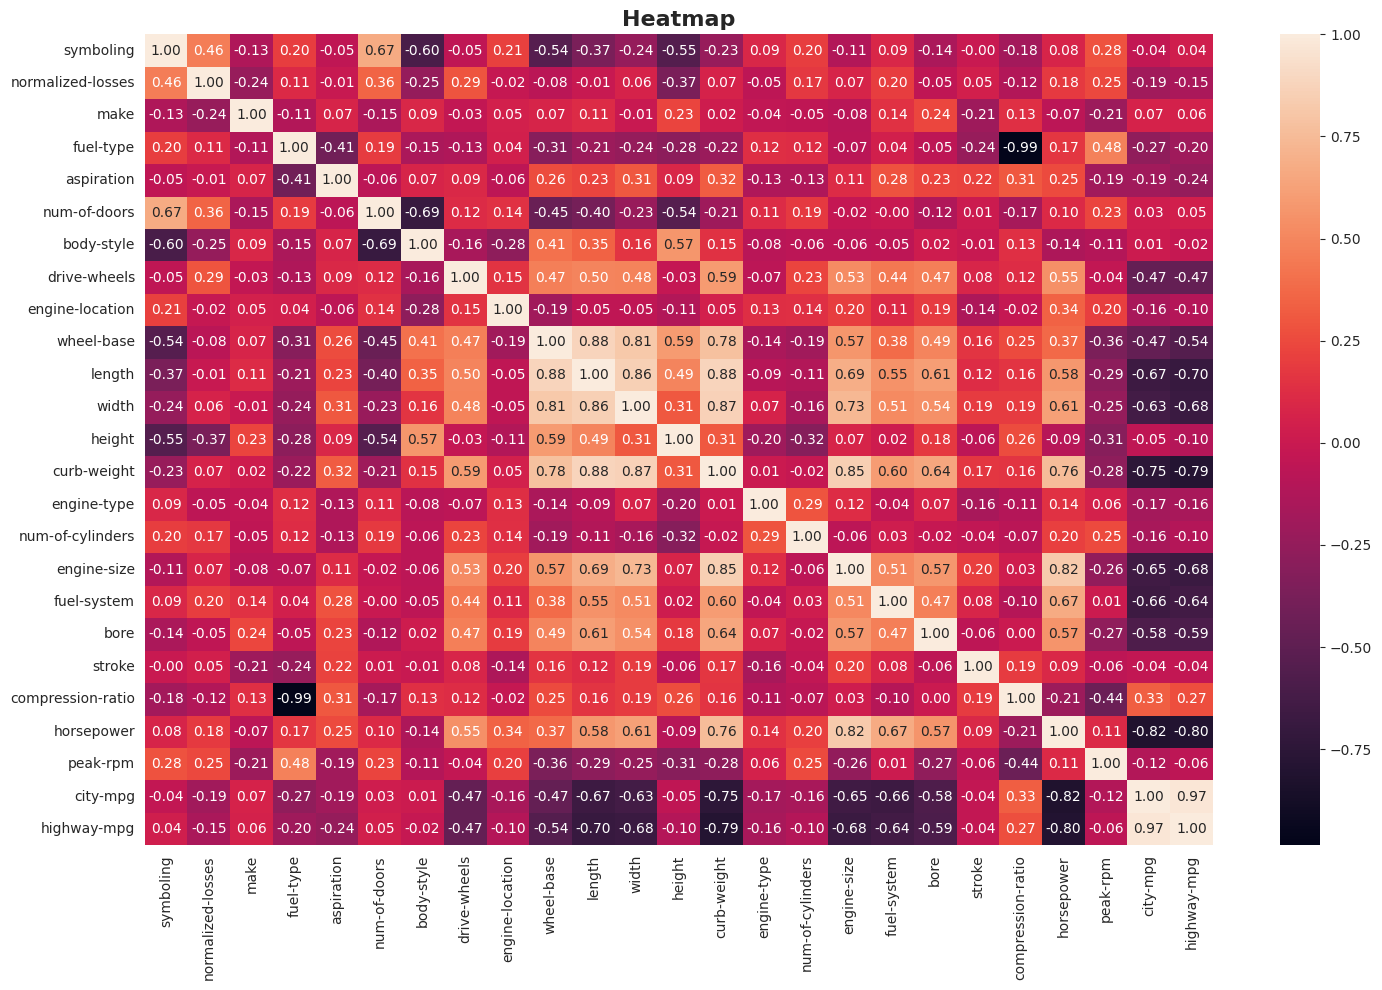

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,fmt='.2f',annot=True)
plt.title("Heatmap", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Correlation columns
corr_matrix = auto.corr().abs()

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

columns_with_corr = [col for col in upper.columns if any(upper[col] > 0.8)]
print(columns_with_corr)


['length', 'width', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'city-mpg', 'highway-mpg', 'price']


## 5.TRAIN TEST SPLIT










*  The dataset was divided into training and testing sets to evaluate model performance.

*   The training set is used to fit the model, while the testing set assesses how well it generalizes to unseen data.

*   This ensures the model’s accuracy is not limited to the data it was trained on.


In [ ]:
X=auto.drop('price',axis=1)
y=auto['price']

### 5.1 SCALING

* StandardScaler is a data preprocessing technique used to normalize numerical features.

* It transforms data so that each feature has a mean of 0 and standard deviation of 1.

In [ ]:
col1=['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']
x_scaler = StandardScaler()
X[col1] = x_scaler.fit_transform(X[col1])

In [ ]:
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y_scaled,test_size=0.2,random_state=42)

In [ ]:
X_train

symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
198  -1.470664          -0.802689    21          1           0             0   
38   -0.671736          -1.114880     5          1           0             0   
24    0.127193           0.851925     4          1           0             0   
122   1.725050           2.038252    15          1           0             1   
196  -1.470664          -0.802689    21          1           0             0   
..         ...                ...   ...        ...         ...           ...   
106  -0.671736          -0.178306    13          1           0             0   
14   -0.671736          -0.178306     2          1           0             0   
92    0.127193           0.227542    12          1           0             1   
179   0.926121           0.040228    20          1           0             1   
102   1.725050           2.288005    12          1           1             1   

     body-style  drive-wheels  engine-location  wheel-base    length  \
198           3             2                0    1.702619  1.187733   
38            3             1                0   -0.379593  0.097548   
24            3             1                0   -0.842307 -1.375017   
122           2             2                0   -0.710103 -0.431274   
196           3             2                0    1.702619  1.187733   
..          ...           ...              ...         ...       ...   
106           4             2                0    2.545419  2.009440   
14            3             2                0    0.777192  1.204005   
92            2             1                0   -0.710103 -0.699752   
179           3             1                0   -0.247389 -0.203474   
102           2             2                0   -1.238919 -0.284831   

        width    height  curb-weight  engine-type  num-of-cylinders  \
198  1.436357  0.709881     0.884353            4                 3   
38  -0.328710  0.136515    -0.487718            2                 2   
24  -0.996574 -1.296897    -1.098174            2                 2   
122  1.150130 -1.460716     0.430872            2                 2   
196  1.436357  0.709881     0.768075            2                 2   
..        ...       ...          ...          ...               ...   
106  1.197835  2.020429     1.306826            1                 2   
14   0.482267  0.791790     1.306826            2                 3   
92  -0.996574 -0.191122    -1.022593            2                 2   
179 -0.185597  0.791790    -0.671824            2                 2   
102  0.959312 -1.665489     1.130473            4                 3   

     engine-size  fuel-system      bore    stroke  compression-ratio  \
198     1.112950            5  0.933744 -1.229208          -0.341497   
38     -0.407197            0 -0.674215  1.022657          -0.291435   
24     -0.889784            1 -1.347314 -0.087417          -0.191309   
122     0.582105            5  2.279942 -0.468014          -0.166278   
196     0.340812            5  1.681631 -0.341149          -0.166278   
..           ...          ...       ...       ...                ...   
106    -0.165904            5  0.485011 -0.214283          -0.441623   
14      1.981605            5  1.083321  0.420045          -0.541748   
92     -0.720878            1 -0.674215  0.102881          -0.191309   
179    -0.431327            5 -0.524638  0.451761          -0.291435   
102     1.305984            5  0.372828  0.039448          -0.591811   

     horsepower  peak-rpm  city-mpg  highway-mpg  
198    0.823097  0.799996 -1.120471    -1.130681  
38    -0.464393  1.428937  0.284194     0.340302  
24    -0.947202  0.799996  0.908490     1.075793  
122    1.064501  0.799996 -0.964397    -0.542288  
196    0.286643  0.590349 -0.340101    -0.395189  
..          ...       ...       ...          ...  
106   -0.169343 -0.248239 -0.964397    -0.983583  
14     2.110586  0.590349 -1.432618    -1.277779  
92

## 6.MODEL BUILDING


*   In this stage, multiple regression algorithms were developed and trained to predict automobile prices based on selected features.

*   The models implemented include Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, Gradient Boosting, and XGBoost.

*  Each model was trained on the processed dataset and evaluated using performance metrics such as R², Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) to assess accuracy and generalization.

*   The goal was to compare all models and identify the most effective one for  automobile price prediction.




In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100,learning_rate=0.2,random_state=42),
    "XGBoost": XGBRegressor(n_estimators=500,learning_rate=0.05,max_depth=6,subsample=0.8,colsample_bytree=0.8,random_state=42)
}

In [ ]:
results = []
trained_models = {}
r2_dict = {}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        "Model": name,
        "R² Score": r2,
        "MAE": mae,
        "RMSE": rmse
    })
    trained_models[name] = model
    r2_dict[name] = r2

## 7.MODEL EVALUATION



*   Multiple regression models were trained and evaluated using performance metrics such as R², MAE, and RMSE.

*   The model with the highest R² score and lowest error values was selected as the best-performing model for predicting automobile prices.



In [ ]:
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
print("Model Comparison Results:")
display(results_df)

Model Comparison Results:


Model  R² Score       MAE      RMSE
6            XGBoost  0.956373  0.176532  0.291439
5  Gradient Boosting  0.949319  0.184511  0.314120
4      Random Forest  0.934600  0.224911  0.356831
3      Decision Tree  0.917121  0.261896  0.401693
0  Linear Regression  0.854832  0.351459  0.531627
1   Ridge Regression  0.847446  0.372223  0.544985
2   Lasso Regression  0.807204  0.421998  0.612662

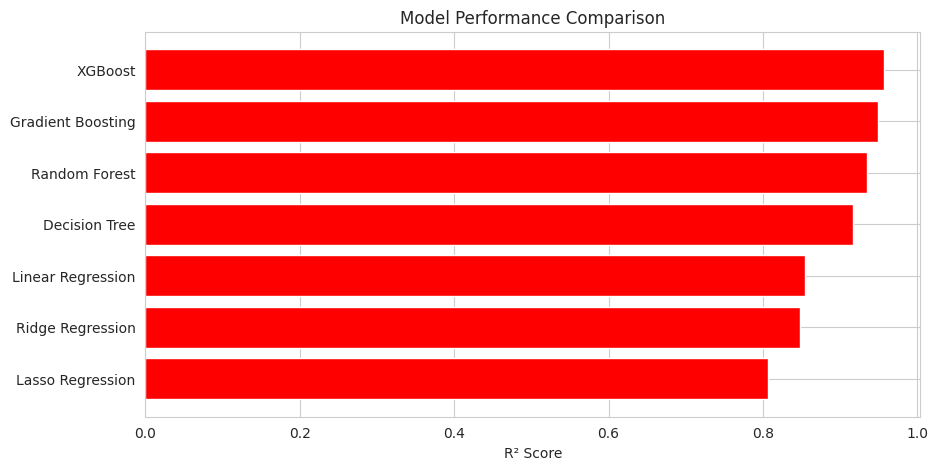

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(results_df["Model"], results_df["R² Score"], color='red')
plt.xlabel("R² Score")
plt.title("Model Performance Comparison")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
best_name = max(r2_dict, key=r2_dict.get)
best_model = trained_models[best_name]

print(f"\n Best model is **{best_name}** with R² Score = {round(r2_dict[best_name], 4)}")


 Best model is **XGBoost** with R² Score = 0.9564


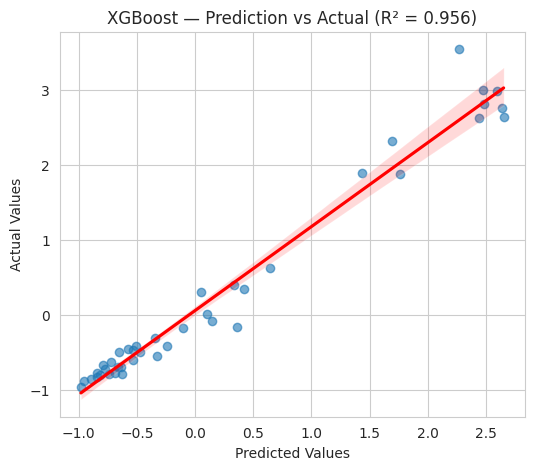

In [ ]:
plt.figure(figsize=(6,5))
sns.regplot(x=y_pred, y=y_test, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title(f"XGBoost — Prediction vs Actual (R² = {r2:.3f})")
plt.show()

Since XGBOOST gives highest R2score we have selected that model for the deployment of the webapp.


## 8.CHECKING THE MODEL

In [ ]:
new_car = {
    'symboling': -1.470664,
    'normalized-losses': -0.802689,
    'make': 21,
    'fuel-type': 1,
    'aspiration': 0,
    'num-of-doors': 0,
    'body-style': 3,
    'drive-wheels': 2,
    'engine-location': 0,
    'wheel-base': 1.702619,
    'length': 1.187733,
    'width': 1.436357,
    'height': 0.709881,
    'curb-weight': 0.884353,
    'engine-type': 4,
    'num-of-cylinders': 3,
    'engine-size': 1.112950,
    'fuel-system': 5,
    'bore': 0.933744,
    'stroke': -1.229208,
    'compression-ratio': -0.341497,
    'horsepower': 0.823097,
    'peak-rpm': 0.799996,
    'city-mpg': -1.120471,
    'highway-mpg': -1.130681
}

In [ ]:
new_car_df = pd.DataFrame([new_car])

In [ ]:
scaled_pred = best_model.predict(new_car_df)[0]

In [ ]:
scaled_pred = np.array(scaled_pred).reshape(-1, 1)
original_pred = y_scaler.inverse_transform(scaled_pred)[0][0]

In [ ]:
print(f"Predicted Automobile Price (Original Scale): {int(round(original_pred))}")

Predicted Automobile Price (Original Scale): 21072





*   The model predicted the automobile’s price as 21,072, while the actual price was 21,485.
*  This shows a very small difference of about 413, which is roughly a 1.9% error.
*   Overall, the model demonstrates excellent predictive accuracy and effectively captures the relationship between the features and the automobile price.






## 9.PIPELINE


We are using a pipeline to combine all preprocessing steps (like encoding and scaling) with the final model.
This ensures the same transformations applied during training are automatically used during prediction, making deployment easier, consistent, and error-free.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_col),
        ('num', StandardScaler(), col1)
    ]
)

In [ ]:
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model)
])


In [ ]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  ['symboling',
                                                   'normalized-losses',
                                                   'wheel-base', 'leng...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [ ]:
sample_pred = final_pipeline.predict(X_test[:1])
print("Pipeline test successful. Sample prediction:", sample_pred)

Pipeline test successful. Sample prediction: [-0.71126455]


In [ ]:
pickle.dump(y_scaler, open("y_scaler.pkl", "wb"))
pickle.dump(final_pipeline, open("model.pkl", "wb"))
print(" model.pkl created successfully with preprocessing pipeline.")

 model.pkl created successfully with preprocessing pipeline.
